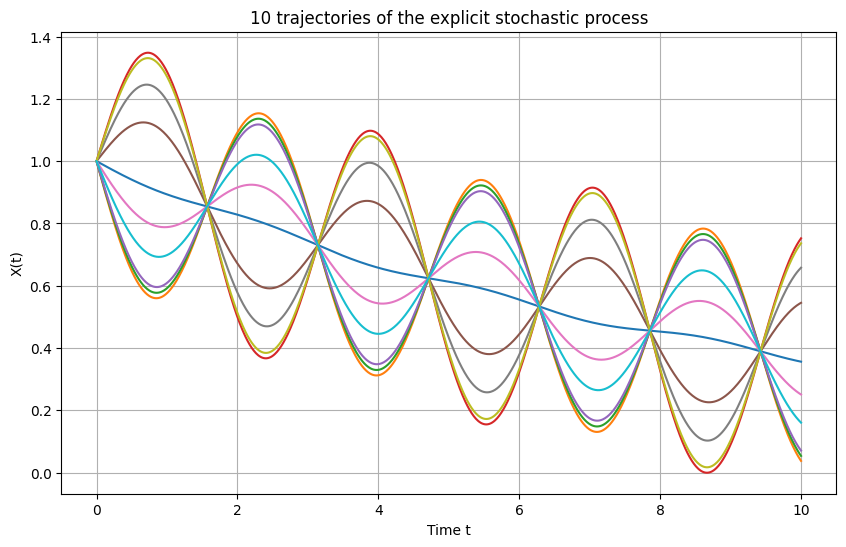

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 10          # final time
dt = 0.01       # time step
N = int(T/dt)   # number of time steps
t = np.linspace(0, T, N)

paths = 10      # number of stochastic paths

# Initialize storage
X = np.zeros((paths, N))

# Simulate paths
for i in range(paths):
    Y = np.random.uniform(-1, 1)  # stochastic amplitude
    X[i, :] = np.exp(-0.1 * t) + 0.5 * np.sin(2 * t) * Y

# Plot all paths
plt.figure(figsize=(10,6))
for i in range(paths):
    plt.plot(t, X[i, :], lw=1.5)
plt.title('10 trajectories of the explicit stochastic process')
plt.xlabel('Time t')
plt.ylabel('X(t)')
plt.grid(True)
plt.show()

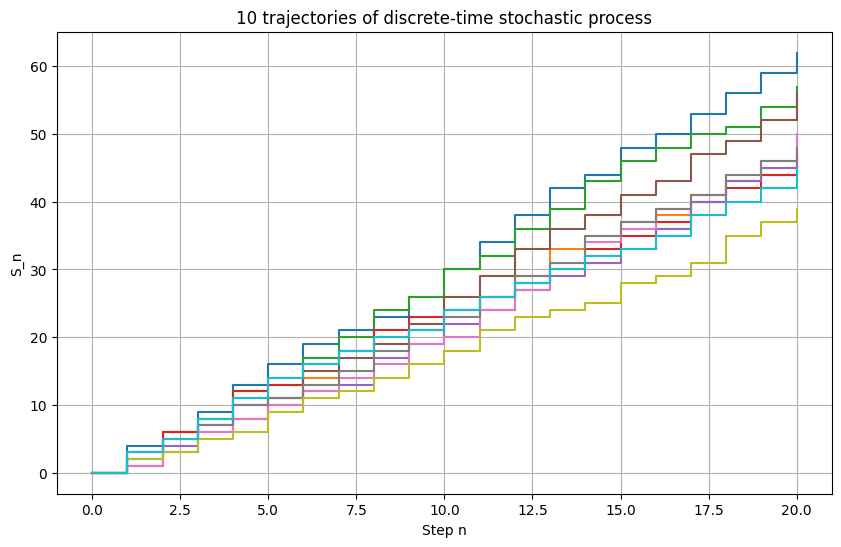

In [3]:
# Parameters
N = 20          # number of discrete steps
paths = 10      # number of paths
m = 3           # number of binomial trials per step
p = 0.5         # probability of success per trial

# Initialize storage
S = np.zeros((paths, N+1), dtype=int)

# Simulate paths
for i in range(paths):
    for n in range(1, N+1):
        X = np.random.binomial(m, p)  # stochastic increment
        S[i, n] = S[i, n-1] + 1 + X  # deterministic + stochastic

# Plot all paths
plt.figure(figsize=(10,6))
for i in range(paths):
    plt.step(range(N+1), S[i,:], where='post')
plt.title('10 trajectories of discrete-time stochastic process')
plt.xlabel('Step n')
plt.ylabel('S_n')
plt.grid(True)
plt.show()


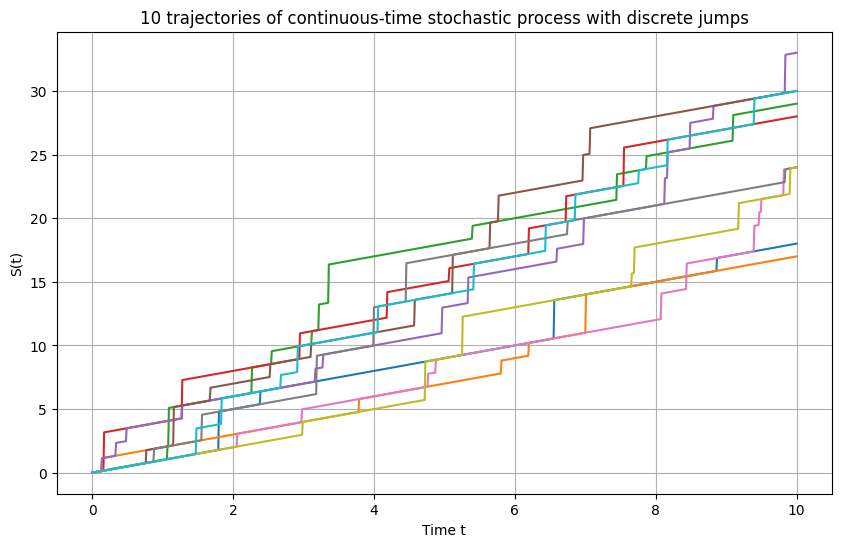

In [5]:
# Parameters
T = 10          # final time
dt = 0.01       # time step
time = np.arange(0, T+dt, dt)
paths = 10      # number of paths
lambda_poisson = 1  # rate of Poisson events
m = 3           # number of binomial trials per stochastic jump
p = 0.5         # probability of success per trial

# Initialize storage
S = np.zeros((paths, len(time)))

# Simulate paths
for i in range(paths):
    S_i = np.zeros(len(time))
    total_jump = 0
    for j, t in enumerate(time):
        # number of new Poisson events in this dt
        dN = np.random.poisson(lambda_poisson*dt)
        # sum binomial increments for these events
        if dN > 0:
            total_jump += np.sum(np.random.binomial(m, p, size=dN))
        S_i[j] = t + total_jump  # deterministic linear + stochastic jumps
    S[i, :] = S_i

# Plot all paths
plt.figure(figsize=(10,6))
for i in range(paths):
    plt.plot(time, S[i,:], lw=1.5)
plt.title('10 trajectories of continuous-time stochastic process with discrete jumps')
plt.xlabel('Time t')
plt.ylabel('S(t)')
plt.grid(True)
plt.show()


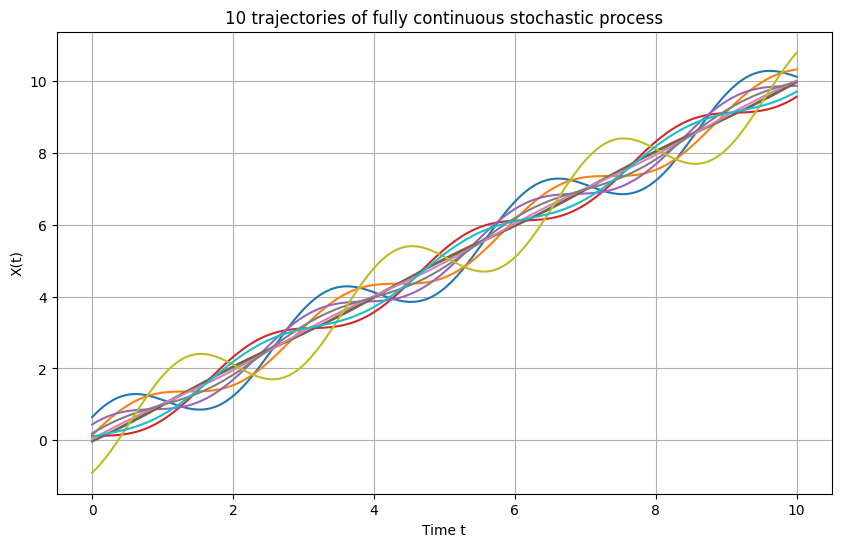

In [6]:
# Parameters
T = 10
dt = 0.01
t = np.arange(0, T+dt, dt)
paths = 10
omega = 2 * np.pi / 3  # oscillation frequency

# Initialize
X = np.zeros((paths, len(t)))

# Simulate paths
for i in range(paths):
    A = np.random.uniform(-1, 1)   # random amplitude
    phi = np.random.uniform(0, 2*np.pi)  # random phase
    X[i, :] = t + A * np.sin(omega*t + phi)

# Plot
plt.figure(figsize=(10,6))
for i in range(paths):
    plt.plot(t, X[i, :], lw=1.5)
plt.title('10 trajectories of fully continuous stochastic process')
plt.xlabel('Time t')
plt.ylabel('X(t)')
plt.grid(True)
plt.show()

Now Brownian motion

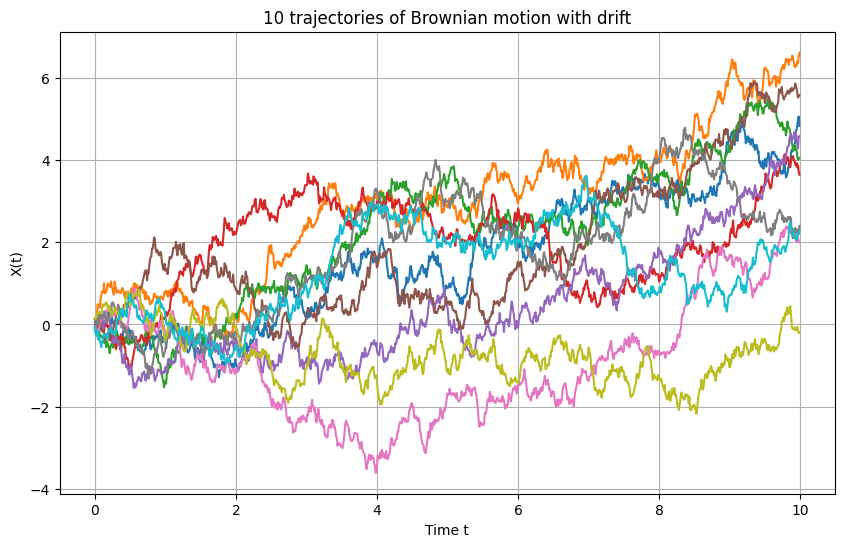

In [10]:
# Parameters
T = 10          # total time
dt = 0.01       # time step
t = np.arange(0, T, dt)
paths = 10      # number of simulated paths
mu = 0.5        # drift
sigma = 1.0     # volatility

# Initialize array
X = np.zeros((paths, len(t)))

# Simulate paths
for i in range(paths):
    dW = np.random.normal(0, np.sqrt(dt), size=len(t))  # Brownian increments
    W = np.cumsum(dW)                                      # Brownian path
    X[i, :] = mu*t + sigma*W

# Plot paths
plt.figure(figsize=(10,6))
for i in range(paths):
    plt.plot(t, X[i,:], lw=1.5)
plt.title('10 trajectories of Brownian motion with drift')
plt.xlabel('Time t')
plt.ylabel('X(t)')
plt.grid(True)
plt.show()